In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [3]:
names_dir= r'C:/Users/User/fol/pushing_git/namesbystate/'
names_data_list=[]
names_columns=['state','gender','year', 'name','babies']
for file in os.listdir(names_dir):
    if file.endswith('.TXT'):
 
        names_data=pd.read_csv(names_dir+file, header=None, names=names_columns)
        names_data_list.append(names_data)
    else:
        continue
names_data=pd.concat(names_data_list)   

In [4]:
data=names_data[names_data['year']>=1950]

In [5]:
data.head(2)

,state,gender,year,name,babies
1269,AK,F,1950,Mary,71
1270,AK,F,1950,Linda,68


In [6]:
data.groupby('gender')['babies'].sum()/data['babies'].sum()

gender
F    0.470011
M    0.529989
Name: babies, dtype: float64

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898774 entries, 1269 to 28750
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   state   object
 1   gender  object
 2   year    int64 
 3   name    object
 4   babies  int64 
dtypes: int64(2), object(3)
memory usage: 168.2+ MB


In [8]:
total_babies=data.babies.sum()
female_percent=data[data.gender=='F']['babies'].sum()/total_babies
male_percent=data[data.gender=='M']['babies'].sum()/total_babies
female_percent

0.4700112923207223

In [9]:
male_percent

0.5299887076792776

In [10]:
most_popular_name=(data.groupby(['name','gender']).babies.sum().reset_index().sort_values('babies',ascending=False))
most_popular_name

,name,gender,babies
21483,Michael,M,3918662
13220,James,M,2902195
7440,David,M,2899746
14681,John,M,2755438
25319,Robert,M,2583575
...,...,...,...
13326,Janann,F,5
13331,Janat,F,5
13333,Janautica,F,5
13342,Jandiel,M,5


In [14]:
most_popular_name[:2]

,name,gender,babies
21483,Michael,M,3918662
13220,James,M,2902195


# Unique names by gender

Calculate and plot number of unique names per gender name

In [11]:
unique_names_per_gender=(data.groupby(['year','gender']).name.nunique().unstack())

In [13]:
unique_names_per_gender.head()

gender,F,M
year,,
1950,2112,1721
1951,2173,1735
1952,2210,1763
1953,2269,1757
1954,2300,1755


In [15]:
unique_names_per_gender.tail()

gender,F,M
year,,
2017,5420,4312
2018,5380,4299
2019,5301,4272
2020,5175,4160
2021,5322,4211


<AxesSubplot:xlabel='year'>

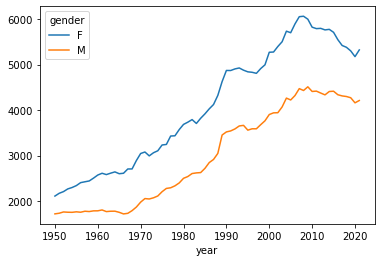

In [17]:
unique_names_per_gender.plot()

<AxesSubplot:xlabel='year'>

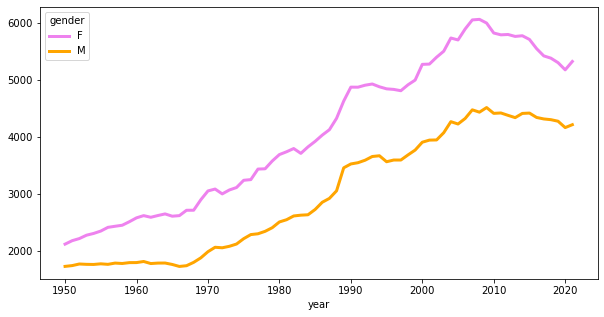

In [25]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=['violet','orange'])

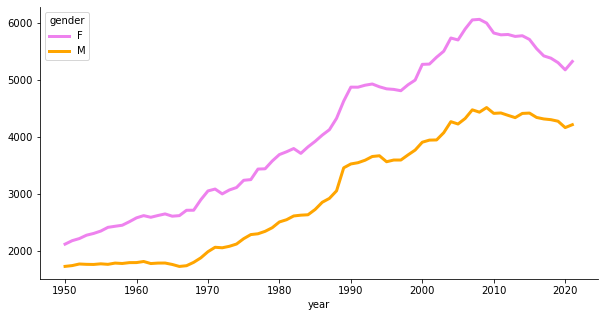

In [26]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=['violet','orange'])
sns.despine()

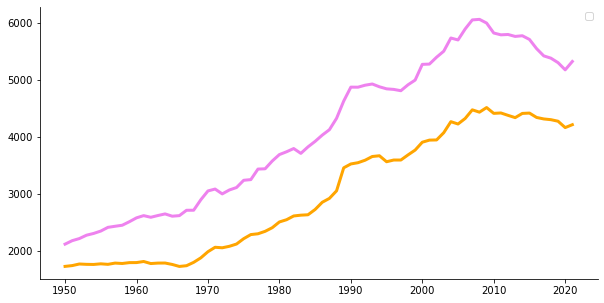

In [27]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=['violet','orange'])
sns.despine()
plt.xlabel('')
plt.legend([])

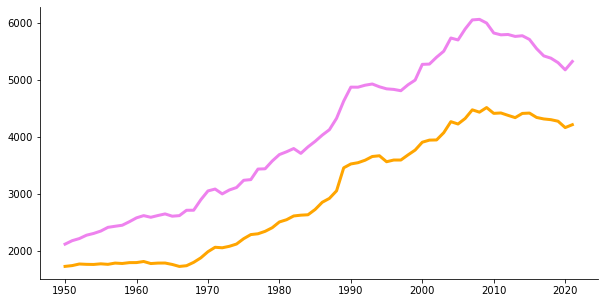

In [28]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=['violet','orange'])
sns.despine()
plt.xlabel('') #removing x-axis label
plt.legend([], frameon=False) #removing the legend box and the legend


Text(10, 0.9, 'Unique babies names\n in the data set')

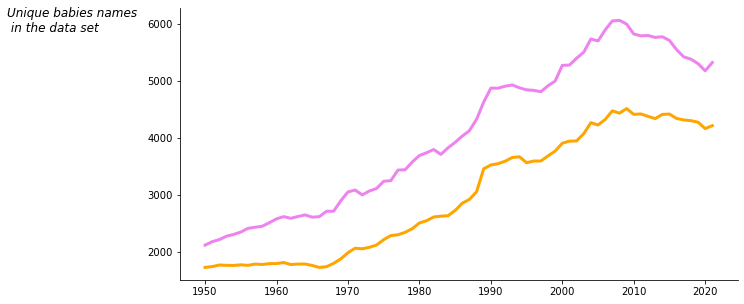

In [50]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=['violet','orange'])
sns.despine()
plt.xlabel('') #removing x-axis label
plt.legend([], frameon=False)
plt.ylabel("Unique babies names\n in the data set", position=(10,0.9),rotation=0, ha='left',labelpad=140, fontsize=12, color='black', style='italic')

Text(2022, 4200, 'male')

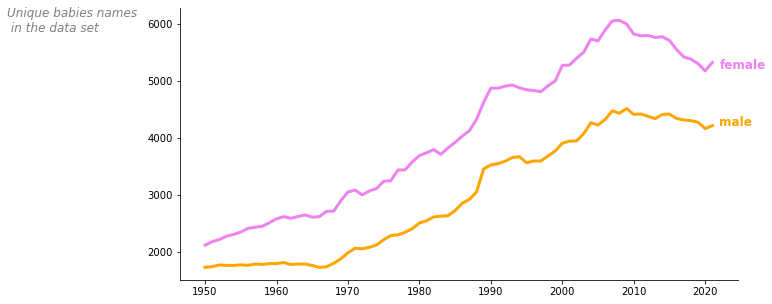

In [55]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=['violet','orange'])
sns.despine()
plt.xlabel('') #removing x-axis label
plt.legend([], frameon=False)
plt.ylabel("Unique babies names\n in the data set", position=(10,0.9),rotation=0, ha='left',labelpad=140, fontsize=12, color='grey', style='italic')
plt.text(2022,5200,'female', color='violet', fontsize=12, fontweight='bold') #adding text on graph 
plt.text(2022,4200,'male', color='orange', fontsize=12, fontweight='bold')

Text(2022, 4000, '53% of babies')

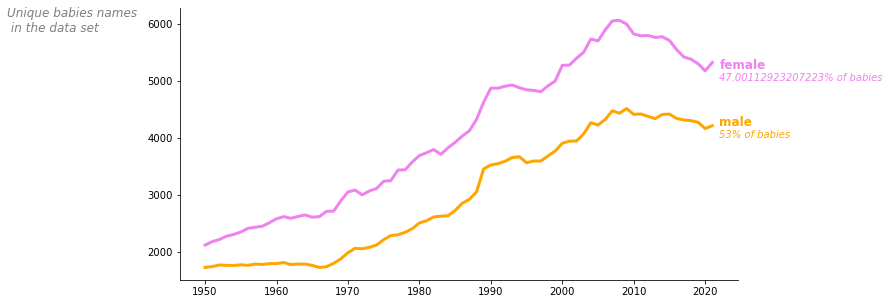

In [57]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=['violet','orange'])
sns.despine()
plt.xlabel('') #removing x-axis label
plt.legend([], frameon=False)
plt.ylabel("Unique babies names\n in the data set", position=(10,0.9),rotation=0, ha='left',labelpad=140, fontsize=12, color='grey', style='italic')
plt.text(2022,5200,'female', color='violet', fontsize=12, fontweight='bold')
plt.text(2022,4200,'male', color='orange', fontsize=12, fontweight='bold')

plt.text(2022,5000, f'{female_percent*100:}% of babies', fontstyle='italic',color='violet')
plt.text(2022,4000, f'{male_percent*100:.0f}% of babies', fontstyle='italic',color='orange') #look at the percent 

Text(2022, 4000, '53% of babies')

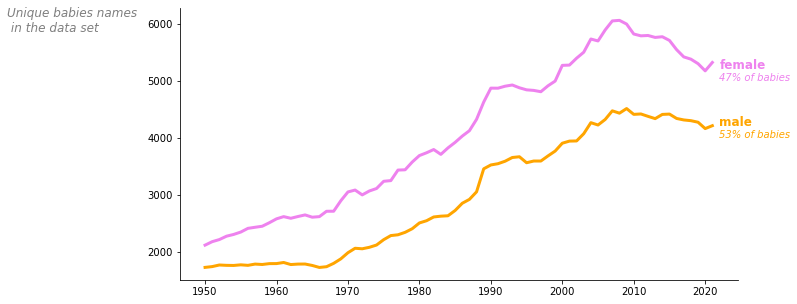

In [58]:
unique_names_per_gender.plot(figsize=(10,5), lw=3, color=['violet','orange'])
sns.despine()
plt.xlabel('') #removing x-axis label
plt.legend([], frameon=False)
plt.ylabel("Unique babies names\n in the data set", position=(10,0.9),rotation=0, ha='left',labelpad=140, fontsize=12, color='grey', style='italic')
plt.text(2022,5200,'female', color='violet', fontsize=12, fontweight='bold')
plt.text(2022,4200,'male', color='orange', fontsize=12, fontweight='bold')

plt.text(2022,5000, f'{female_percent*100:.0f}% of babies', fontstyle='italic',color='violet')
plt.text(2022,4000, f'{male_percent*100:.0f}% of babies', fontstyle='italic',color='orange') #look at the percent 

In [59]:
ax.get_yaxis().set_major_formatter(
fucnformattter(lambda x, p:format(str(int(x/1000)+k)))
    plt.title('Fewer')

NameError: name 'fucnformattter' is not defined